**DEEP LEARNING ALGORITHM TO FIND OUT THE TYPE OF FRUIT**


The model will be trained on a set of 9 different types of fruits:

Apples,Oranges,Mangoes,Strawberries,Banana,Grapes,Pineapples,Watermelons and Sitafal (Sugar Apples??)

**DOWNLOADING IMAGE DATASET FROM GOOGLE IMAGES**

Go to images.google.com. Open the browser console.

Google Chrome -> Ctrl-Shift_J -> Paste code below into console to grab images


urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));



***There are some issues with the latest version of torch.
Downgrade and it works fine. ***

In [0]:
!pip uninstall -y torchvision

!pip uninstall -y torch

!pip install torchvision==0.2.0

!pip install torch==1.0.0

import torch
print(torch.__version__)

import torchvision
print(torchvision.__version__)

from fastai.vision import *


Code below mounts my personal Google drive on this runtime.

If you are not me, download: 

https://drive.google.com/open?id=1hAynWFw9C817nejobGLTL_65qEecRGkF

Then create a folder 'FRUITS' and upload the files there. 

In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# !cp -r '/content/gdrive/My Drive/FRUITS' '/content/'

In [0]:
path = Path('FRUITS/')

In [0]:
folder = 'apples'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

folder = 'oranges'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

folder = 'bananas'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

folder = 'grapes'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

folder = 'mangoes'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)


folder = 'pineapples'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

folder = 'strawberries'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

folder = 'watermelons'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

folder = 'sitafal'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [31]:
path.ls()

[PosixPath('FRUITS/sitafal'),
 PosixPath('FRUITS/grapes'),
 PosixPath('FRUITS/urls_apples.csv'),
 PosixPath('FRUITS/test_mangoes.jpg'),
 PosixPath('FRUITS/test_pineapples.jpg'),
 PosixPath('FRUITS/test_watermelons.jpg'),
 PosixPath('FRUITS/urls_pineapples.csv'),
 PosixPath('FRUITS/mangoes'),
 PosixPath('FRUITS/urls_bananas.csv'),
 PosixPath('FRUITS/urls_watermelons.csv'),
 PosixPath('FRUITS/trained_model.pkl'),
 PosixPath('FRUITS/test_strawberries.jpg'),
 PosixPath('FRUITS/urls_grapes.csv'),
 PosixPath('FRUITS/test_sitafal.jpg'),
 PosixPath('FRUITS/test_oranges.jpg'),
 PosixPath('FRUITS/test_grapes.jpg'),
 PosixPath('FRUITS/urls_oranges.csv'),
 PosixPath('FRUITS/pineapples'),
 PosixPath('FRUITS/strawberries'),
 PosixPath('FRUITS/test_bananas.jpg'),
 PosixPath('FRUITS/urls_sitafal.csv'),
 PosixPath('FRUITS/watermelons'),
 PosixPath('FRUITS/urls_strawberries.csv'),
 PosixPath('FRUITS/apples'),
 PosixPath('FRUITS/test_apples.jpg'),
 PosixPath('FRUITS/oranges'),
 PosixPath('FRUITS/urls_man

In [0]:
classes = ['apples','oranges','bananas','grapes','mangoes','pineapples','strawberries','watermelons','sitafal']

In [33]:
for fruit in classes:
  print(fruit)

apples
oranges
bananas
grapes
mangoes
pineapples
strawberries
watermelons
sitafal


In [0]:
for fruit in classes:
  print(fruit)
  dest = Path(str(path) + '/' + fruit)
  file = 'urls_' + fruit + '.csv'
  download_images(path/file, dest, max_pics=200)


In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
np.random.seed(42)

In [0]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [39]:
data.classes

['FRUITS',
 'apples',
 'bananas',
 'grapes',
 'mangoes',
 'oranges',
 'pineapples',
 'sitafal',
 'strawberries',
 'watermelons']

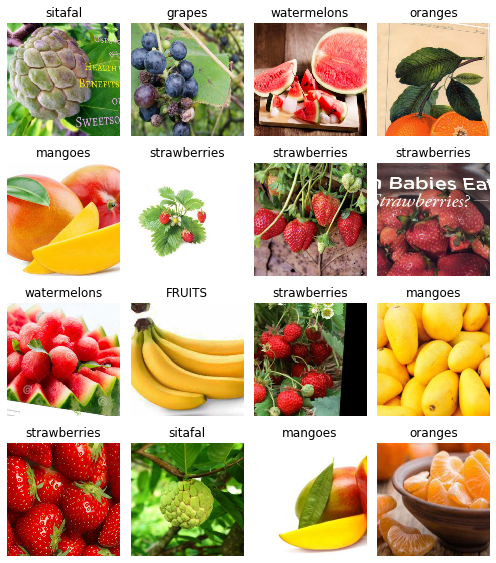

In [40]:
data.show_batch(rows=4, figsize=(7,8))

In [41]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['FRUITS',
  'apples',
  'bananas',
  'grapes',
  'mangoes',
  'oranges',
  'pineapples',
  'sitafal',
  'strawberries',
  'watermelons'],
 10,
 688,
 172)

In [42]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 52782914.49it/s]


In [43]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.264157,0.914841,0.191860,00:15
1,1.359331,0.357237,0.093023,00:14
2,0.951400,0.312468,0.075581,00:14
3,0.729277,0.305094,0.075581,00:13


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [46]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


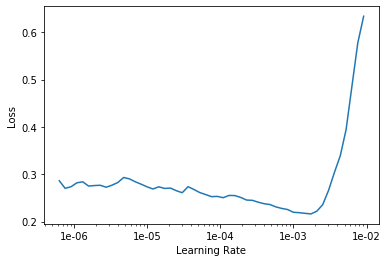

In [47]:
learn.recorder.plot()

Stage 2 isn't needed since we achieved a 0.0 % error rate yay!

*   List item
*   List item



In [0]:
learn.load('stage-1');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

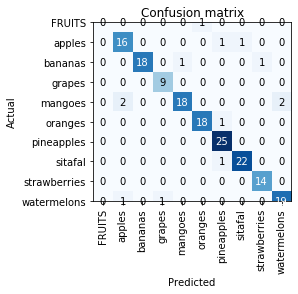

In [50]:
interp.plot_confusion_matrix()

Below code saves all the computation done above in a .pkl file.
So we don't need to train the model again and again for every test run.
See 'fruits_pretrained.ipnb' to see this in action.

In [0]:
learn.export('trained_model.pkl')

In [0]:
defaults.device = torch.device('cpu')

Edit the below text to specify any uploaded image and run all code below again
to test.

In [57]:
# Edit this path to try out other images
image_for_testing = Path(str(path) + '/test_mangoes.jpg')
image_for_testing

PosixPath('FRUITS/test_mangoes.jpg')

FRUITS


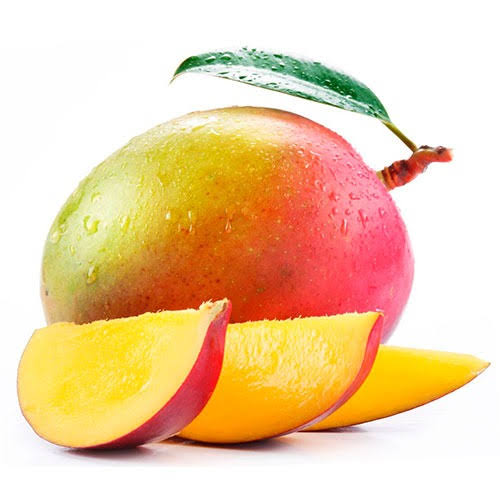

In [58]:
print(path)
img = open_image(image_for_testing)
img

In [0]:
learn = load_learner(path)
pred_class,pred_idx,outputs = learn.predict(img)
pred_class